# Minneapolis E-Scooters Research

This notebook is only a small part of this research project and details the process I undertook to make the dataset of more than one million scooter trips manageable enough to analyze on my personal computer and use in ArcGIS to more easily output attractive maps.

In later steps, not seen in this particular notebook, I integrated data from the Census (for demographics), the City (for built environment data like street density), and the Metropolitan Council (for locations of transit stops). I then analyzed the data to audit if the e-scooter companies were meeting the guidelines given to them by the City before allowing them to operate (essentially, ensuring access in Areas of Concentrated Poverty). I finally performed regression analyses on the data to compute the associations between the "5 D's" and various demographics groups that I had targeted.
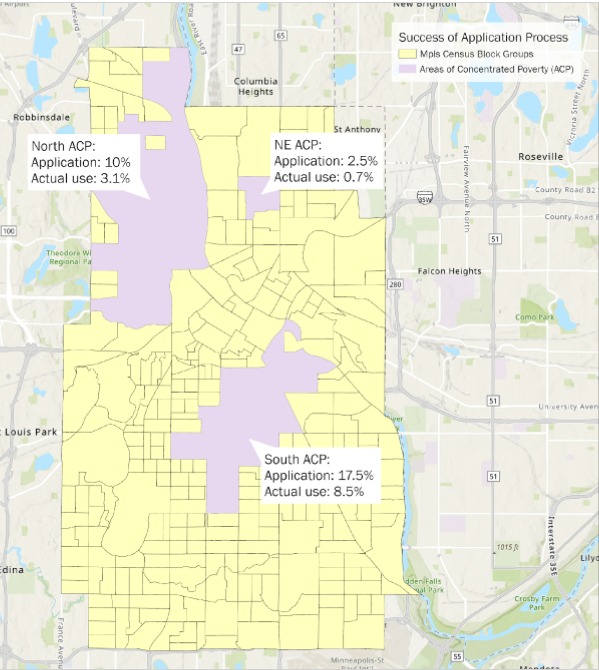

In [36]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [37]:
import geopandas as gpd

In [38]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import pandas as pd

In [40]:
July = pd.read_csv("https://opendata.arcgis.com/datasets/ad9b4feddc4549caaf8be421375c9b8f_0.csv")

In [41]:
May = pd.read_csv("https://opendata.arcgis.com/datasets/7fff2f78728d40259c1cdfbe90b5471b_0.csv")

In [42]:
June = pd.read_csv("https://opendata.arcgis.com/datasets/39025968b3ec46a6b81c87fe963abf45_0.csv")

In [43]:
August = pd.read_csv("https://opendata.arcgis.com/datasets/f803b3e2d78c45ec96d2aaa7a2e164cc_0.csv")

In [44]:
September = pd.read_csv("https://opendata.arcgis.com/datasets/1eebb18148cf4f48a9a1669057eaa480_0.csv")

In [45]:
October = pd.read_csv("https://opendata.arcgis.com/datasets/c1a69db25f164ed1a05786ff57936aee_0.csv")

In [46]:
November = pd.read_csv("https://opendata.arcgis.com/datasets/94797abf060d41299274a8b379612dfd_0.csv")

In [47]:
May_June = May.append(June, ignore_index=True)

In [48]:
June_July = May_June.append(July,ignore_index=True)

In [49]:
July_August = June_July.append(August,ignore_index=True)

In [50]:
August_September = July_August.append(September,ignore_index=True)

In [51]:
September_October = August_September.append(October,ignore_index=True)

In [52]:
October_November = September_October.append(November,ignore_index=True)

In [53]:
Trips=October_November

In [54]:
Trips

,ObjectId,TripID,TripDuration,TripDistance,StartTime,EndTime,StartCenterlineID,StartCenterlineType,EndCenterlineID,EndCenterlineType
0,1,1123,2365,10626,2019/05/13 16:30:00,2019/05/13 17:29:59,19121.00,street,19585.00,street
1,2,1107,319,1634,2019/05/13 16:30:00,2019/05/13 16:30:00,16633.00,street,20336.00,street
2,3,1109,542,1023,2019/05/13 16:30:00,2019/05/13 16:30:00,25935.00,street,17116.00,street
3,4,1116,2519,6848,2019/05/13 16:30:00,2019/05/13 17:29:59,E33C3AB3-55C9-4874-A32D-586B8F07E889,trail,17053.00,street
4,5,1117,540,1325,2019/05/13 16:30:00,2019/05/13 17:00:00,17242.00,street,16903.00,street
...,...,...,...,...,...,...,...,...,...,...
1040546,49463,1076939,560,1696,2019/11/25 18:30:00,2019/11/25 18:30:00,15151.00,street,E433BF15-98A4-4D03-9BE0-20E9384D4893,trail
1040547,49464,1076943,310,715,2019/11/25 18:30:00,2019/11/25 18:30:00,25922.00,street,16639.00,street
1040548,49465,1076959,281,1162,2019/11/25 18:30:00,2019/11/25 18:59:59,118F147C-8B8C-46C4-807E-A3C504BE4A66,trail,16641.00,street
1040549,49466,1076961,269,279,2019/11/25 18:30:00,2019/11/25 18:59:59,21868.00,street,18343.00,street


In [55]:
Trips=Trips.drop(['TripID','TripDuration','EndTime','StartCenterlineType','EndCenterlineType'], axis=1)

In [56]:
Trips

,ObjectId,TripDistance,StartTime,StartCenterlineID,EndCenterlineID
0,1,10626,2019/05/13 16:30:00,19121.00,19585.00
1,2,1634,2019/05/13 16:30:00,16633.00,20336.00
2,3,1023,2019/05/13 16:30:00,25935.00,17116.00
3,4,6848,2019/05/13 16:30:00,E33C3AB3-55C9-4874-A32D-586B8F07E889,17053.00
4,5,1325,2019/05/13 16:30:00,17242.00,16903.00
...,...,...,...,...,...
1040546,49463,1696,2019/11/25 18:30:00,15151.00,E433BF15-98A4-4D03-9BE0-20E9384D4893
1040547,49464,715,2019/11/25 18:30:00,25922.00,16639.00
1040548,49465,1162,2019/11/25 18:30:00,118F147C-8B8C-46C4-807E-A3C504BE4A66,16641.00
1040549,49466,279,2019/11/25 18:30:00,21868.00,18343.00


In [57]:
Trips_Start=Trips['StartCenterlineID'].value_counts()
Trips_Start

5EEDCBB2-B574-42F3-9914-181161C0B838    11978
16638.00                                11152
18754.00                                10521
0A7745DD-4328-4460-A945-DC4E2FC05B14    10397
16641.00                                 9321
                                        ...  
11070.00                                    1
10062.00                                    1
10822.00                                    1
17015.00                                    1
18243.00                                    1
Name: StartCenterlineID, Length: 9887, dtype: int64

In [58]:
Trips_End=Trips['EndCenterlineID'].value_counts()
Trips_End

0A7745DD-4328-4460-A945-DC4E2FC05B14    12169
5EEDCBB2-B574-42F3-9914-181161C0B838    11952
81F66B7F-852B-4539-8064-46CB07B99692     9561
18754.00                                 8527
17116.00                                 8465
                                        ...  
17340.00                                    1
12165.00                                    1
22338.00                                    1
21463.00                                    1
4DDFE67C-61E3-494F-A1C1-DF2F7797CF5B        1
Name: EndCenterlineID, Length: 11010, dtype: int64

In [59]:
Trips_Start.to_csv (r'C:\Users\mtdun\Desktop\Trips_Start.csv', index = True, header=True)

In [60]:
Trips_End.to_csv (r'C:\Users\mtdun\Desktop\Trips_End.csv', index = True, header=True)

In [61]:
Trip_Times=Trips
Trip_Times

,ObjectId,TripDistance,StartTime,StartCenterlineID,EndCenterlineID
0,1,10626,2019/05/13 16:30:00,19121.00,19585.00
1,2,1634,2019/05/13 16:30:00,16633.00,20336.00
2,3,1023,2019/05/13 16:30:00,25935.00,17116.00
3,4,6848,2019/05/13 16:30:00,E33C3AB3-55C9-4874-A32D-586B8F07E889,17053.00
4,5,1325,2019/05/13 16:30:00,17242.00,16903.00
...,...,...,...,...,...
1040546,49463,1696,2019/11/25 18:30:00,15151.00,E433BF15-98A4-4D03-9BE0-20E9384D4893
1040547,49464,715,2019/11/25 18:30:00,25922.00,16639.00
1040548,49465,1162,2019/11/25 18:30:00,118F147C-8B8C-46C4-807E-A3C504BE4A66,16641.00
1040549,49466,279,2019/11/25 18:30:00,21868.00,18343.00


In [62]:
Trip_Times['StartTime'] = Trip_Times['StartTime'].str[11:]
Trip_Times

,ObjectId,TripDistance,StartTime,StartCenterlineID,EndCenterlineID
0,1,10626,16:30:00,19121.00,19585.00
1,2,1634,16:30:00,16633.00,20336.00
2,3,1023,16:30:00,25935.00,17116.00
3,4,6848,16:30:00,E33C3AB3-55C9-4874-A32D-586B8F07E889,17053.00
4,5,1325,16:30:00,17242.00,16903.00
...,...,...,...,...,...
1040546,49463,1696,18:30:00,15151.00,E433BF15-98A4-4D03-9BE0-20E9384D4893
1040547,49464,715,18:30:00,25922.00,16639.00
1040548,49465,1162,18:30:00,118F147C-8B8C-46C4-807E-A3C504BE4A66,16641.00
1040549,49466,279,18:30:00,21868.00,18343.00


In [65]:
Trip_Times_Freq=Trip_Times[["StartTime", "StartCenterlineID"]].value_counts()
Trip_Times_Freq

StartTime  StartCenterlineID                   
14:29:59   0A7745DD-4328-4460-A945-DC4E2FC05B14    700
15:30:00   0A7745DD-4328-4460-A945-DC4E2FC05B14    674
11:00:00   81F66B7F-852B-4539-8064-46CB07B99692    669
15:00:00   0A7745DD-4328-4460-A945-DC4E2FC05B14    668
11:00:00   19437.00                                644
                                                  ... 
12:30:00   16366.00                                  1
18:00:00   61179DD8-F56B-4680-B25C-12EB656E998A      1
12:30:00   16354.00                                  1
18:00:00   61199C4F-6D2A-4001-83B1-473E52BAB502      1
00:00:00   01D5B3A8-473C-4F5D-814F-A1EB8C9D4C7C      1
Length: 117835, dtype: int64

In [66]:
Trip_Times_Freq.to_csv (r'C:\Users\mtdun\Desktop\Trip_Times_Freq.csv', index = True, header=True)